# Missing values-Feature engineering

### Types of Missing values

 1,Missing completely at random (MCAR) : if probability of being missing is same for all observations and there is no relation                                          between missing nad other values.e.g. Embarked in titanic dataset.
 2,Missibg data not at random(MNAR)    : There may be some relationship exists.e.g.Cabin & Age data in titanic dataset.
 3,Missing data at random (MAR)        : e.g.Men hide their salary or women hide their age

##Techniques of handling missing values

1, Mean/median/mode replacement
2, Random sample imputation
3, Capturing NAN values with a new feature
4, End of distribution imputation
5, Arbitrary imputation
6, Frequent category imputation



#### 1, Mean/median/mode replacement
Applied when the data are missing completely at random(MCAR)


In [4]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Dell\Downloads\train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
###filling missing values in dataset using function
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
median=df.Age.median()
impute_nan(df,'Age',median)
df.head()
    
        


,Survived,Age,Fare,Age-median,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [8]:
###checking standard deviation before and after filling NANs of Age
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


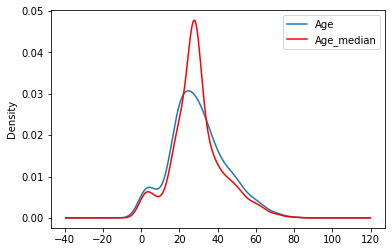

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

###Advantages and disadvantages
1, Easy to implement
2, faster way to obtain complete dataset

Disadvantages:

1, Distortion in original variance
2, impacts correlation due change in variance

#### 2,Random sample imputation

Taking random observation from dataset and use for NAN. Assumes that data are missing completely at random(MCAR)

In [5]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # have random sample to fill NAN
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
median=df.Age.median()
impute_nan(df,'Age',median)

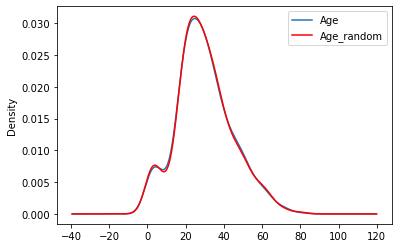

In [9]:
## Let's compare standard deviation of Age and Age_random
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_random'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Adavantages
Less distortion in variance

#### Disadvantages

Randomness won't work in every situation

#### 3, Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [13]:
import numpy as np
df=pd.read_csv(r'C:\Users\Dell\Downloads\train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [15]:
df['Age'].fillna(df.Age.median(),inplace=True)

#### Advantages:

captures importance of missing values

#### Disadvantages

Creates new features (Curse of dimensionality)

#### 4, End of distortion imputation

<AxesSubplot:>

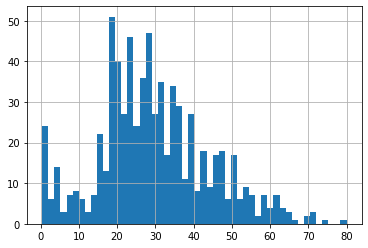

In [16]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\train.csv',usecols=['Age','Fare','Survived'])
df.Age.hist(bins=50)


In [18]:
## Let's impute with value which is which is after 3rd standard deviation
extreme=df.Age.mean()+3*df.Age.std()
print(extreme)

73.27860964406095


In [19]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distortion"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
impute_nan(df,'Age',df.Age.median(),extreme)
df.head()

,Survived,Age,Fare,Age_end_distortion
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

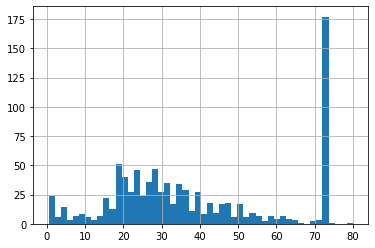

In [21]:
df.Age_end_distortion.hist(bins=50)

And when we draw boxplot, there will be no more outliers in 'Age_end_distortion'.

#### Disadvantages

Distorts original distribution of variable



#### 5, Arbitrary value imputation

It consists of replacing NAN by an arbitrary (outlier) value

In [22]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0) #Left outlier
    df[variable+'_eighty']=df[variable].fillna(80) #Right outlier
    

#### Advantages

captures importance of missingness

#### Disadvantages

Distorts original distribution of variable

## Missing categorical values :

using Advance house price prediction dataset

### 1, Frequent category imputatuion

In [5]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\train (2).csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [7]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
# Lets see how to know to get index of most frequent category in a column

df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [10]:
# Replacing function

def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)
    
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    

#### Disadvantages

when missing values are more than 50% then there may be distortion of original feature 

#### 2, Adding a variable to capture NAN

In [17]:
# Case1 :
df=pd.read_csv(r'C:\Users\Dell\Downloads\train (2).csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
## 1,Create a variable which captures importance of NANs in a feature

df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [19]:
## 2, After this, filling NAN with most frequent values

frequent=df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


#### case 2

we just replace NAN with new category 'Missing'

In [21]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)    

Created 3 variables same as first 3 but replacing NANs with new category 'Missing'. Now dropping 3 original features

In [22]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,0,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,0,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,0,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,0,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,0,Gd,TA,Attchd
